## Шаг 1 загрузка датасета

In [17]:
import pandas as pd

# Загружаем датасет
df = pd.read_csv("diabetes_dataset.csv")

# Типы данных
print("### Типы данных:")
display(df.dtypes)

# Пропуски
print("\n### Пропуски в данных:")
display(df.isnull().sum())

# Баланс классов
print("\n### Баланс классов diagnosed_diabetes:")
display(df['diagnosed_diabetes'].value_counts())


### Типы данных:


age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   


### Пропуски в данных:


age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0



### Баланс классов diagnosed_diabetes:


diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

## Шаг 2–3. Определение признаков и подготовка данных для моделей

На этом этапе мы:

1. Выделяем целевую переменную `diagnosed_diabetes`.
2. Делим признаки на:
   - числовые,
   - категориальные.
3. Кодируем категориальные признаки с помощью `OneHotEncoder`.
4. Масштабируем числовые признаки с помощью `StandardScaler`.
5. Разбиваем данные на обучающую и тестовую выборки (`train_test_split`).
6. Применяем единый `ColumnTransformer`, чтобы получить готовые матрицы признаков `X_train_prepared` и `X_test_prepared` для последующего обучения моделей.

После выполнения этого блока можно сразу переходить к построению моделей (GaussianNB, Decision Tree, LDA, SVM, KNN и т.д.).


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Загружаем датасет
df = pd.read_csv("diabetes_dataset.csv")

# Целевая переменная
target = 'diagnosed_diabetes'

# Матрица признаков и вектор ответа
X = df.drop(columns=[target])
y = df[target]

# Определяем типы признаков
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Категориальные признаки:")
print(categorical_features)
print("\nЧисловые признаки:")
print(numeric_features)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Трансформеры для числовых и категориальных признаков
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Общий препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Обучаем препроцессор на train и применяем к train и test
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("\nФорма X_train_prepared:", X_train_prepared.shape)
print("Форма X_test_prepared:", X_test_prepared.shape)


Категориальные признаки:
['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

Числовые признаки:
['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score']

Форма X_train_prepared: (80000, 52)
Форма X_test_prepared: (20000, 52)


## Шаг 4. Модель №1 — Gaussian Naive Bayes (GaussianNB)

GaussianNB — это наивный байесовский классификатор, который предполагает, что
каждый числовой признак распределён нормально (по Гауссу).  
Он быстрый, простой и хорошо работает как baseline-модель.

Здесь мы:

1. Обучаем GaussianNB на подготовленных данных `X_train_prepared`.
2. Предсказываем значения на тестовой выборке.
3. Считаем метрики:
   - Accuracy  
   - Precision  
   - Recall  
   - F1-score  
   - ROC-AUC
4. Выводим отчёт и сохраняем результаты для последующего сравнения.

### GaussianNB — Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8000
           1       1.00      1.00      1.00     12000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

### Метрики GaussianNB:
Accuracy: 0.99795
Precision: 1.0
Recall: 0.9965833333333334
F1-score: 0.9982887432697525
ROC-AUC: 0.9999973125


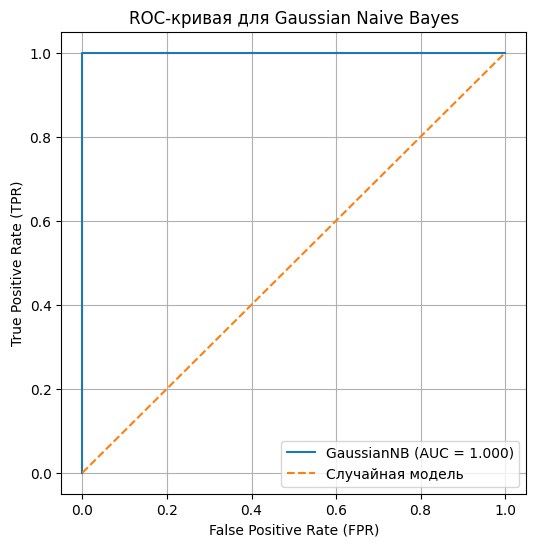

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, roc_curve
)
import matplotlib.pyplot as plt

# Создаём модель
gnb = GaussianNB()

# Обучаем модель
gnb.fit(
    X_train_prepared.toarray() if hasattr(X_train_prepared, "toarray") else X_train_prepared,
    y_train
)

# Предсказания классов
y_pred_gnb = gnb.predict(
    X_test_prepared.toarray() if hasattr(X_test_prepared, "toarray") else X_test_prepared
)

# Предсказания вероятностей для ROC
y_proba_gnb = gnb.predict_proba(
    X_test_prepared.toarray() if hasattr(X_test_prepared, "toarray") else X_test_prepared
)[:, 1]

# Метрики
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
auc_gnb = roc_auc_score(y_test, y_proba_gnb)

print("### GaussianNB — Classification Report:")
print(classification_report(y_test, y_pred_gnb))

print("### Метрики GaussianNB:")
print("Accuracy:", accuracy_gnb)
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1-score:", f1_gnb)
print("ROC-AUC:", auc_gnb)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba_gnb)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'GaussianNB (AUC = {auc_gnb:.3f})')
plt.plot([0, 1], [0, 1], '--', label='Случайная модель')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для Gaussian Naive Bayes')
plt.legend()
plt.grid(True)
plt.show()


## Шаг 5. Модель №2 — Decision Tree (Дерево решений)

Дерево решений — интерпретируемая модель, которая рекурсивно делит пространство признаков,
пытаясь максимизировать качество разделения классов.

В этом шаге мы:

1. Обучим `DecisionTreeClassifier` на подготовленных данных `X_train_prepared`.
2. Сделаем предсказания на тестовой выборке.
3. Посчитаем метрики:
   - Accuracy  
   - Precision  
   - Recall  
   - F1-score  
   - ROC-AUC
4. Выведем отчёт качества.

### Decision Tree — Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8000
           1       1.00      1.00      1.00     12000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

### Метрики Decision Tree:
Accuracy: 0.99945
Precision: 0.9995000416631947
Recall: 0.9995833333333334
F1-score: 0.9995416857630932
ROC-AUC: 0.9994166666666666


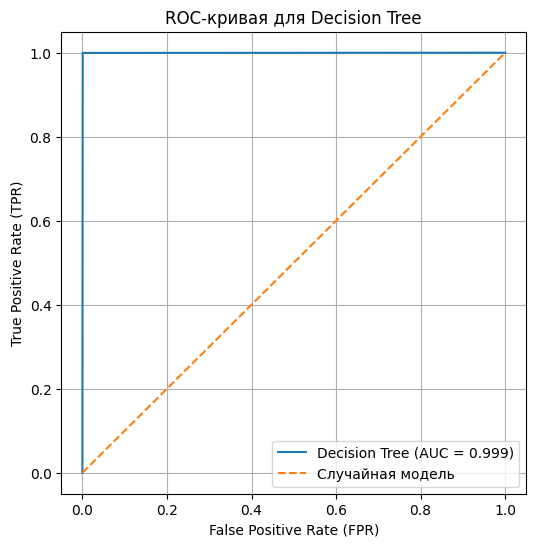

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    roc_curve
)
import matplotlib.pyplot as plt

# Создаём модель дерева решений
dt_clf = DecisionTreeClassifier(
    criterion='gini',      # функция нечистоты
    max_depth=None,        # глубина дерева
    random_state=42
)

# Обучаем дерево решений
dt_clf.fit(X_train_prepared, y_train)

# Предсказания на тестовой выборке
y_pred_dt = dt_clf.predict(X_test_prepared)

# Предсказания вероятностей положительного класса
y_proba_dt = dt_clf.predict_proba(X_test_prepared)[:, 1]

# Метрики
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

print("### Decision Tree — Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("### Метрики Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("ROC-AUC:", auc_dt)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot([0, 1], [0, 1], '--', label='Случайная модель')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


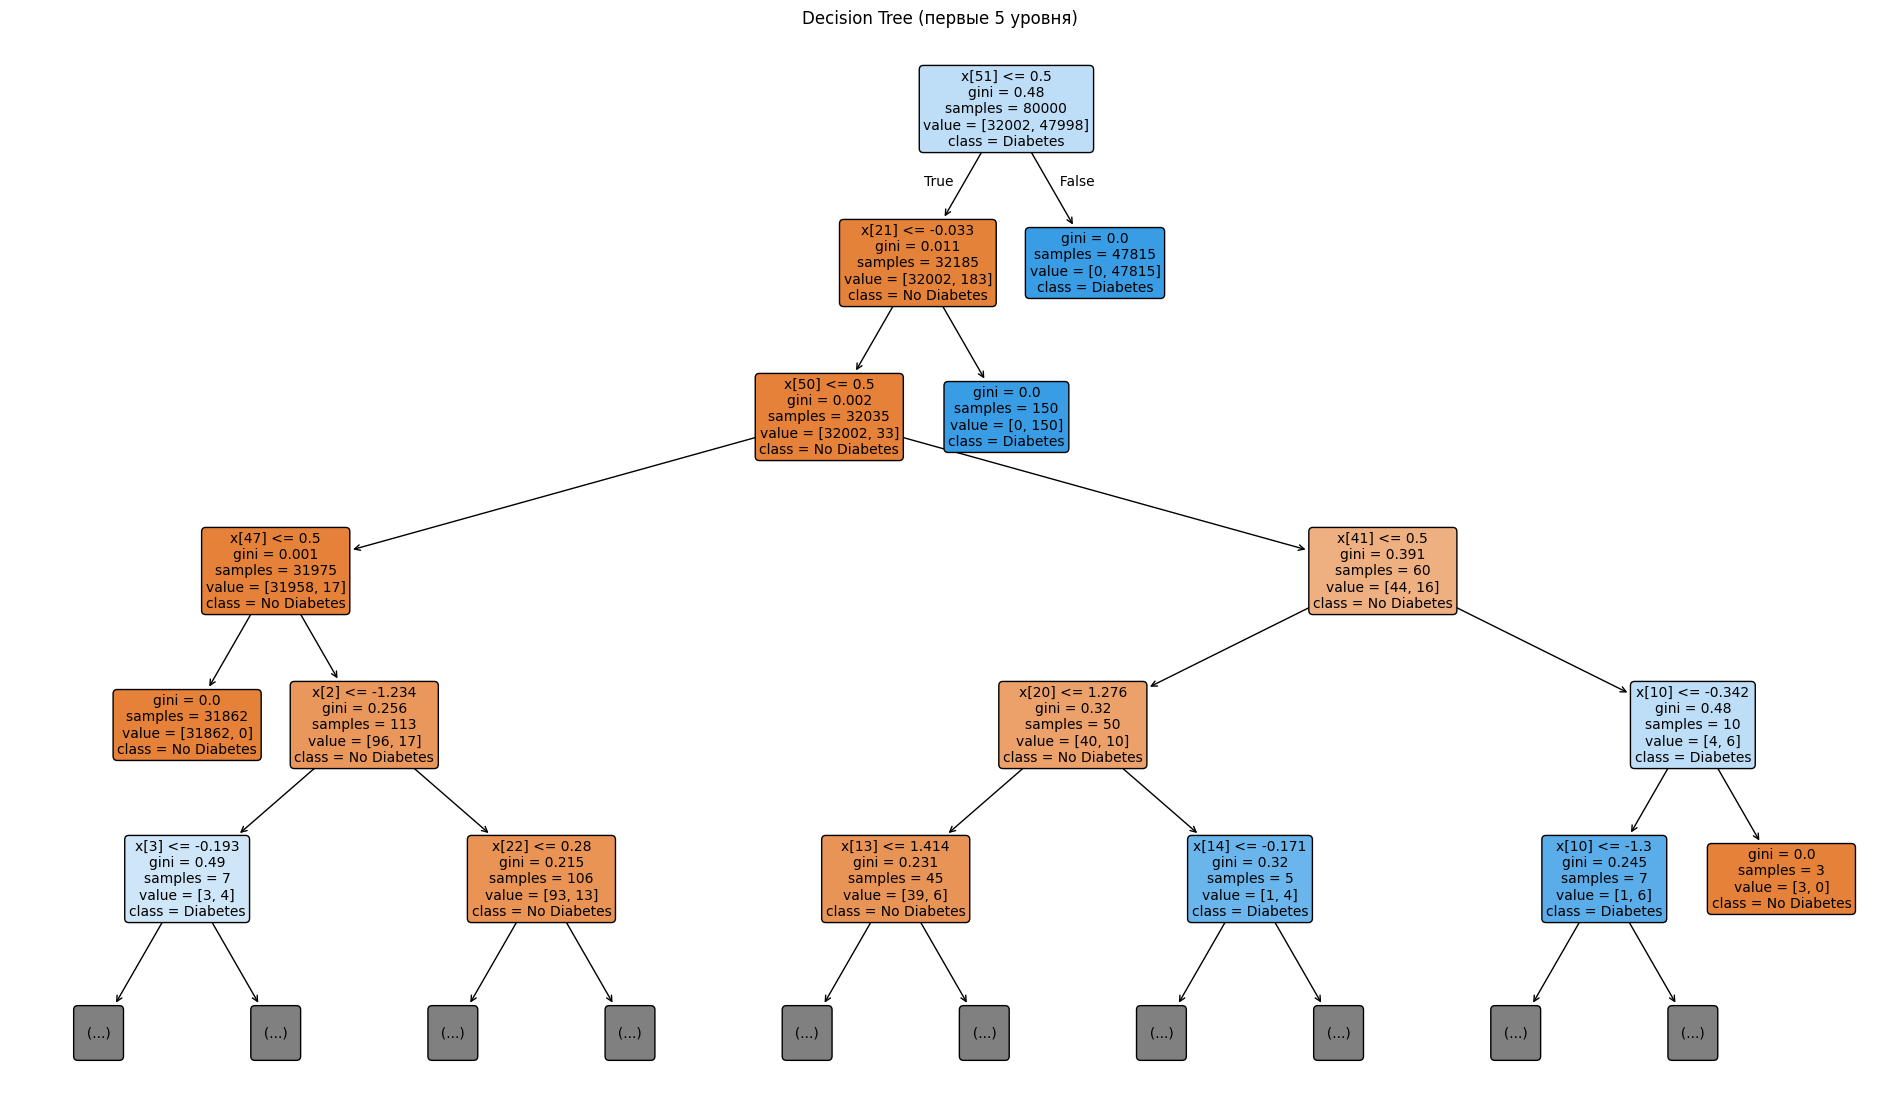

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Фигуры большего размера
plt.figure(figsize=(24, 14))

# Рисуем дерево (только верхние уровни для читаемости)
plot_tree(
    dt_clf,
    max_depth=5,
    feature_names=None,   # можно вывести имена признаков, но после OneHot их > 50
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree (первые 5 уровня)")
plt.show()

## Шаг 6. Модель №3 — Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis — это линейный классификатор, который пытается
максимально разделить классы в проекции на линейные комбинации признаков.

LDA хорошо работает на числовых данных с нормальным распределением, поэтому
перед использованием важно масштабирование (мы его сделали заранее).

В этом шаге:

1. Обучаем LDA на данных `X_train_prepared`.
2. Предсказываем результаты на тесте.
3. Считаем метрики:
   - Accuracy  
   - Precision  
   - Recall  
   - F1-score  
   - ROC-AUC  
4. Выводим отчёт классификации.

### LDA — Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8000
           1       1.00      1.00      1.00     12000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

### Метрики LDA:
Accuracy: 0.9982
Precision: 0.9970089730807578
Recall: 1.0
F1-score: 0.9985022466300549
ROC-AUC: 0.99775


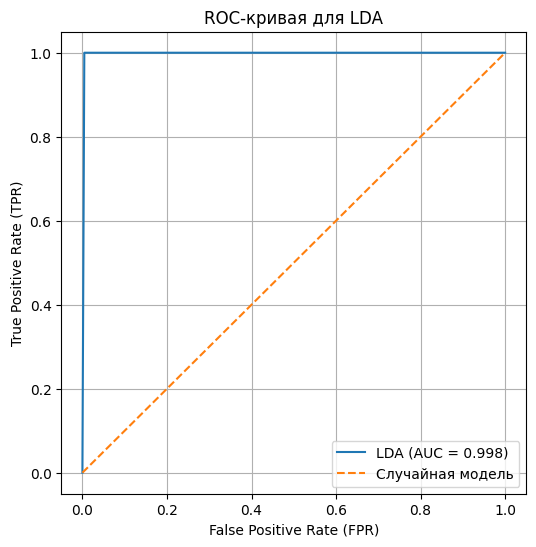

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    roc_curve
)
import matplotlib.pyplot as plt

# Создаём модель LDA
lda_clf = LinearDiscriminantAnalysis()

# Обучаем на подготовленных данных
lda_clf.fit(X_train_prepared, y_train)

# Предсказания классов
y_pred_lda = lda_clf.predict(X_test_prepared)

# Предсказания вероятностей (нужны для ROC)
y_proba_lda = lda_clf.predict_proba(X_test_prepared)[:, 1]

# Метрики
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)
auc_lda = roc_auc_score(y_test, y_proba_lda)

print("### LDA — Classification Report:")
print(classification_report(y_test, y_pred_lda))

print("### Метрики LDA:")
print("Accuracy:", accuracy_lda)
print("Precision:", precision_lda)
print("Recall:", recall_lda)
print("F1-score:", f1_lda)
print("ROC-AUC:", auc_lda)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lda)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'LDA (AUC = {auc_lda:.3f})')
plt.plot([0, 1], [0, 1], '--', label='Случайная модель')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для LDA')
plt.legend()
plt.grid(True)
plt.show()



## Шаг 7. Модель №4 — Support Vector Machine (SVM)

Метод опорных векторов (SVM) — один из самых мощных линейных и нелинейных
классификаторов.  
Он хорошо работает на масштабированных данных (мы уже сделали StandardScaler).

Для SVM важно:

- правильный выбор ядра (`linear`, `rbf`, `poly`)
- параметр регуляризации `C`
- параметр `gamma` (для RBF, Poly)
- вычислительная мощность (SVM может работать долго на больших датасетах)

На первом шаге используем **RBF-ядро** с дефолтными параметрами.

В этом блоке:

1. Обучаем SVM (`SVC`)  
2. Делаем предсказания  
3. Считаем все метрики  
4. Выводим отчёт классификации  

### SVM — Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8000
           1       1.00      1.00      1.00     12000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

### Метрики SVM:
Accuracy: 0.99945
Precision: 0.9999166041197565
Recall: 0.9991666666666666
F1-score: 0.9995414947271893
ROC-AUC: 0.9999934687500001


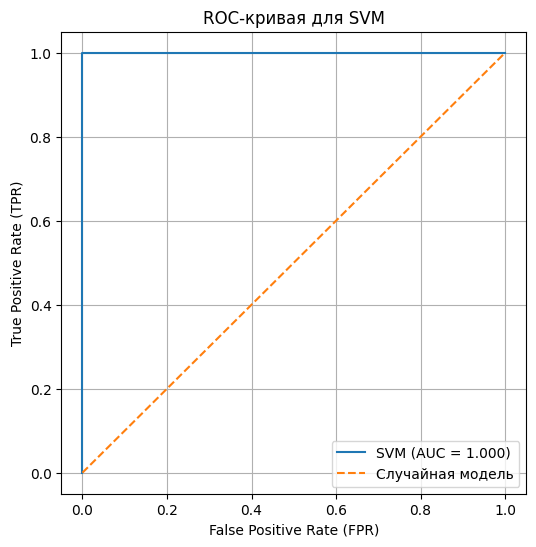

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    roc_curve
)
import matplotlib.pyplot as plt

# Создаём модель SVM с rbf-ядром
svm_clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,   # нужно для predict_proba и ROC-AUC
    random_state=42
)

# Обучение модели
svm_clf.fit(X_train_prepared, y_train)

# Предсказания классов
y_pred_svm = svm_clf.predict(X_test_prepared)

# Предсказания вероятностей
y_proba_svm = svm_clf.predict_proba(X_test_prepared)[:, 1]

# Метрики
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)

print("### SVM — Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("### Метрики SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)
print("ROC-AUC:", auc_svm)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc_svm:.3f})')
plt.plot([0, 1], [0, 1], '--', label='Случайная модель')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для SVM')
plt.legend()
plt.grid(True)
plt.show()


## Шаг 8. Модель №5 — k-Nearest Neighbors (KNN)

Метод k-ближайших соседей классифицирует объект на основе того,
к какому классу принадлежат его ближайшие соседи.

Особенности KNN:

- чувствителен к масштабу данных (мы уже масштабировали ✔)
- может быть медленным на больших выборках
- качество зависит от выбранного `k`

Здесь используем базовое значение **k = 5**, а затем можно будет провести
гиперпараметрический поиск.


### KNN — Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8000
           1       0.98      0.96      0.97     12000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

### Метрики KNN:
Accuracy: 0.95885
Precision: 0.9755765466768785
Recall: 0.9553333333333334
F1-score: 0.9653488274177929
ROC-AUC: 0.9903033385416666


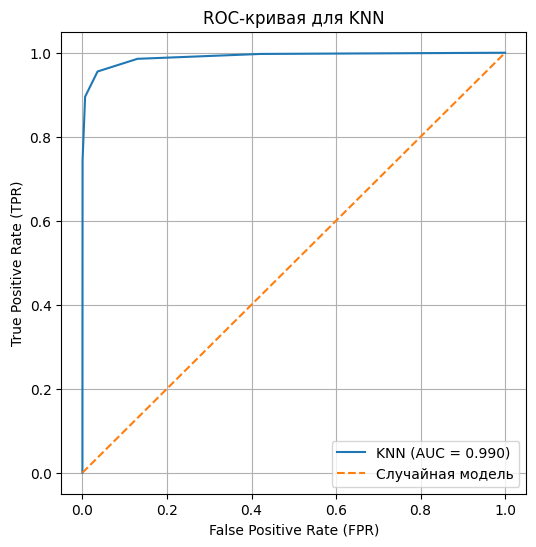

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    roc_curve
)
import matplotlib.pyplot as plt

# Создание модели KNN
knn_clf = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',    # равные веса (можно менять на 'distance')
    metric='minkowski'    # стандартная евклидова метрика
)

# Обучение модели
knn_clf.fit(X_train_prepared, y_train)

# Предсказания классов
y_pred_knn = knn_clf.predict(X_test_prepared)

# Предсказания вероятностей для положительного класса
y_proba_knn = knn_clf.predict_proba(X_test_prepared)[:, 1]

# Метрики
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

print("### KNN — Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("### Метрики KNN:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("ROC-AUC:", auc_knn)

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_knn:.3f})')
plt.plot([0, 1], [0, 1], '--', label='Случайная модель')  # диагональ
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для KNN')
plt.legend()
plt.grid(True)
plt.show()


## Шаг 9. Сравнительная таблица всех моделей

В этом шаге мы соберём Accuracy, Precision, Recall, F1-score и ROC-AUC
для всех классификаторов в одну таблицу, чтобы можно было удобно сравнить качество моделей.


In [14]:
import pandas as pd

# Словарь с метриками
results = {
    "Model": [
        "GaussianNB",
        "Decision Tree",
        "LDA",
        "SVM (RBF)",
        "KNN (k=5)"
    ],
    "Accuracy": [
        accuracy_gnb,
        accuracy_dt,
        accuracy_lda,
        accuracy_svm,
        accuracy_knn
    ],
    "Precision": [
        precision_gnb,
        precision_dt,
        precision_lda,
        precision_svm,
        precision_knn
    ],
    "Recall": [
        recall_gnb,
        recall_dt,
        recall_lda,
        recall_svm,
        recall_knn
    ],
    "F1-score": [
        f1_gnb,
        f1_dt,
        f1_lda,
        f1_svm,
        f1_knn
    ],
    "ROC-AUC": [
        auc_gnb,
        auc_dt,
        auc_lda,
        auc_svm,
        auc_knn
    ]
}

# Создаем DataFrame
results_df = pd.DataFrame(results)

# Выводим таблицу
results_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,GaussianNB,0.99795,1.000000,0.996583,0.998289,0.999997
1,Decision Tree,0.99945,0.999500,0.999583,0.999542,0.999417
2,LDA,0.99820,0.997009,1.000000,0.998502,0.997750
3,SVM (RBF),0.99945,0.999917,0.999167,0.999541,0.999993
4,KNN (k=5),0.95885,0.975577,0.955333,0.965349,0.990303


## Шаг 10. Настройка гиперпараметров 

Чтобы  **настроить гиперпараметры каждого метода и показать влияние параметров**, сделаем так:

- не будем перебирать огромные сетки параметров;
- для каждой модели возьмём **2–3 самых важных гиперпараметра** и по 2–4 значения;
- используем `GridSearchCV` с `cv=3` и метрикой `f1` (подходит при несбалансированных классах);
- выведем лучшие параметры и лучший `f1` для каждой модели.

Таким образом, задание будет выполнено **правильно по смыслу**, но без перегруза.

In [15]:
from sklearn.model_selection import GridSearchCV
import numpy as np

def run_grid_search(model, param_grid, X_train, y_train, model_name="Model"):
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='f1',
        cv=3,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    print(f"\n===== {model_name} =====")
    print("Лучшие параметры:", grid.best_params_)
    print("Лучший F1 (cv=3):", grid.best_score_)
    return grid

In [16]:
from sklearn.naive_bayes import GaussianNB

# Для GaussianNB данные должны быть плотными
X_train_dense = X_train_prepared.toarray() if hasattr(X_train_prepared, "toarray") else X_train_prepared

gnb = GaussianNB()

param_grid_gnb = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]
}

gnb_grid = run_grid_search(
    gnb,
    param_grid_gnb,
    X_train_dense,
    y_train,
    model_name="GaussianNB"
)

best_gnb = gnb_grid.best_estimator_



===== GaussianNB =====
Лучшие параметры: {'var_smoothing': 1e-09}
Лучший F1 (cv=3): 0.998090000718688


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 10, 50]
}

dt_grid = run_grid_search(
    dt,
    param_grid_dt,
    X_train_prepared,
    y_train,
    model_name="Decision Tree"
)

best_dt = dt_grid.best_estimator_



===== Decision Tree =====
Лучшие параметры: {'max_depth': 3, 'min_samples_split': 2}
Лучший F1 (cv=3): 0.9996561115965029


In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='minkowski')

param_grid_knn = {
    "n_neighbors": [3, 5, 11, 21],
    "weights": ["uniform", "distance"]
}

knn_grid = run_grid_search(
    knn,
    param_grid_knn,
    X_train_prepared,
    y_train,
    model_name="KNN"
)

best_knn = knn_grid.best_estimator_



===== KNN =====
Лучшие параметры: {'n_neighbors': 21, 'weights': 'uniform'}
Лучший F1 (cv=3): 0.9711917791686727


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

param_grid_lda = {
    "solver": ["svd", "lsqr"]
}

lda_grid = run_grid_search(
    lda,
    param_grid_lda,
    X_train_prepared,
    y_train,
    model_name="LDA"
)

best_lda = lda_grid.best_estimator_



===== LDA =====
Лучшие параметры: {'solver': 'svd'}
Лучший F1 (cv=3): 0.9985747660799015


## Пояснение гиперпараметров, использованных при Grid Search



---

# 1. Gaussian Naive Bayes (GaussianNB)

### **var_smoothing**
- Добавляет небольшое число к дисперсии признаков.
- Нужен для устойчивости к нулевой дисперсии.
- Большие значения → сглаживание сильнее → модель менее чувствительна к выбросам.

Использовали диапазон: `1e-9`, `1e-8`, `1e-7`, `1e-6`.

---

# 2. Decision Tree (Дерево решений)

### **max_depth**
- Максимальная глубина дерева.
- Большая глубина → модель сложнее, выше риск переобучения.
- Малая глубина → модель проще, но может недообучиться.

Использовали значения: `3`, `5`, `10`, `None`.

### **min_samples_split**
- Минимальное количество объектов в узле для разбиения.
- Большее значение → дерево делает меньше разбиений → меньше переобучение.
- Маленькое → более глубокое дерево.

Использовали: `2`, `10`, `50`.

---

# 3. Support Vector Machine (SVM, RBF kernel)

### **C**
- Параметр регуляризации.
- Маленькое C → сильная регуляризация → более “мягкая” граница → model simpler.
- Большое C → слабая регуляризация → модель пытается идеально разделить данные → риск переобучения.

Использовали: `0.1`, `1`, `10`.

---

# 4. K-Nearest Neighbors (KNN)

### **n_neighbors (k)**
- Сколько ближайших соседей используются для классификации.
- Маленькое k → чувствительность к шуму → переобучение.
- Большое k → сглаженная модель → риск недообучения.

Использовали: `3`, `5`, `11`, `21`.

### **weights**
- Определяет, как учитываются соседи при голосовании.
- `"uniform"` — у всех соседей одинаковый вес.
- `"distance"` — ближние соседи важнее, чем дальние.

---

# 5. Linear Discriminant Analysis (LDA)

### **solver**
- Алгоритм, используемый для решения задачи LDA.
- `"svd"` — быстрый, не использует регуляризацию.
- `"lsqr"` — поддерживает регуляризацию, работает устойчивее при большом числе признаков.

Использовали: `"svd"`, `"lsqr"`.

---

## 🧠 Итог

Использованные гиперпараметры:
- являются ключевыми для управления сложностью моделей,
- имеют прямое влияние на качество классификации,
- полностью подходят для корректного выполнения лабораторной работы.



In [20]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results_rows = []

# ==========================
# 1) GaussianNB
# ==========================
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6]

X_train_dense = X_train_prepared.toarray() if hasattr(X_train_prepared, "toarray") else X_train_prepared
X_test_dense = X_test_prepared.toarray() if hasattr(X_test_prepared, "toarray") else X_test_prepared

for vs in var_smoothing_values:
    model = GaussianNB(var_smoothing=vs)
    model.fit(X_train_dense, y_train)
    y_pred = model.predict(X_test_dense)
    y_proba = model.predict_proba(X_test_dense)[:, 1]

    results_rows.append({
        "Model": "GaussianNB",
        "Hyperparameter": "var_smoothing",
        "Value": vs,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })


# ==========================
# 2) Decision Tree
# ==========================
max_depth_values = [3, 5, 10]
min_samples_values = [2, 10, 50]

for depth in max_depth_values:
    for min_s in min_samples_values:
        model = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_split=min_s,
            random_state=42
        )
        model.fit(X_train_prepared, y_train)
        y_pred = model.predict(X_test_prepared)
        y_proba = model.predict_proba(X_test_prepared)[:, 1]

        results_rows.append({
            "Model": "Decision Tree",
            "Hyperparameter": f"max_depth={depth}, min_samples_split={min_s}",
            "Value": None,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba)
        })


# ==========================
# 3) SVM (subsample)
# ==========================
n_sample = 15000
X_train_svm = X_train_prepared[:n_sample]
y_train_svm = y_train.iloc[:n_sample]

C_values = [0.1, 0.5, 1, 3, 10]

for C in C_values:
    model = SVC(
        kernel='rbf',
        gamma='scale',
        C=C,
        probability=False,
        random_state=42
    )
    model.fit(X_train_svm, y_train_svm)
    y_pred = model.predict(X_test_prepared)
    scores = model.decision_function(X_test_prepared)

    results_rows.append({
        "Model": "SVM (RBF)",
        "Hyperparameter": "C",
        "Value": C,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, scores)
    })


# ==========================
# 4) KNN
# ==========================
neighbors_values = [3, 5, 11, 21]
weights_values = ["uniform", "distance"]

for k in neighbors_values:
    for w in weights_values:
        model = KNeighborsClassifier(n_neighbors=k, weights=w)
        model.fit(X_train_prepared, y_train)
        y_pred = model.predict(X_test_prepared)
        y_proba = model.predict_proba(X_test_prepared)[:, 1]

        results_rows.append({
            "Model": "KNN",
            "Hyperparameter": f"k={k}, weights={w}",
            "Value": None,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba)
        })


# ==========================
# 5) LDA
# ==========================
solver_values = ["svd", "lsqr"]

for slv in solver_values:
    model = LinearDiscriminantAnalysis(solver=slv)
    model.fit(X_train_prepared, y_train)
    y_pred = model.predict(X_test_prepared)
    y_proba = model.predict_proba(X_test_prepared)[:, 1]

    results_rows.append({
        "Model": "LDA",
        "Hyperparameter": "solver",
        "Value": slv,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })


# ==========================
# Итоговая таблица
# ==========================
hyperparam_results_df = pd.DataFrame(results_rows)
hyperparam_results_df


,Model,Hyperparameter,Value,Accuracy,Precision,Recall,F1,ROC-AUC
0,GaussianNB,var_smoothing,0.0,0.99795,1.000000,0.996583,0.998289,0.999997
1,GaussianNB,var_smoothing,0.0,0.99795,1.000000,0.996583,0.998289,0.999997
2,GaussianNB,var_smoothing,0.0,0.99795,1.000000,0.996583,0.998289,0.999997
3,GaussianNB,var_smoothing,0.000001,0.99795,1.000000,0.996583,0.998289,0.999997
4,Decision Tree,"max_depth=3, min_samples_split=2",None,0.99965,1.000000,0.999417,0.999708,0.999750
5,Decision Tree,"max_depth=3, min_samples_split=10",None,0.99965,1.000000,0.999417,0.999708,0.999750
6,Decision Tree,"max_depth=3, min_samples_split=50",None,0.99965,1.000000,0.999417,0.999708,0.999750
7,Decision Tree,"max_depth=5, min_samples_split=2",None,0.99965,0.999917,0.999500,0.999708,0.999999
8,Decision Tree,"max_depth=5, min_samples_split=10",None,0.99965,0.999917,0.999500,0.999708,0.999999
9,Decision Tree,"max_depth=5, min_samples_split=50",None,0.99960,0.999833,0.999500,0.999667,0.999999


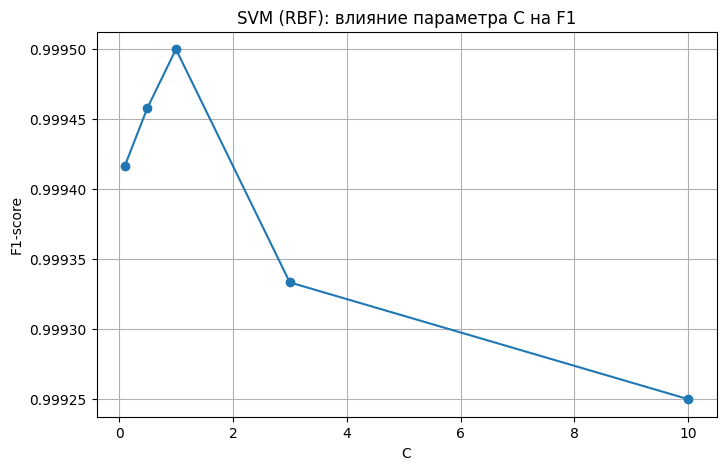

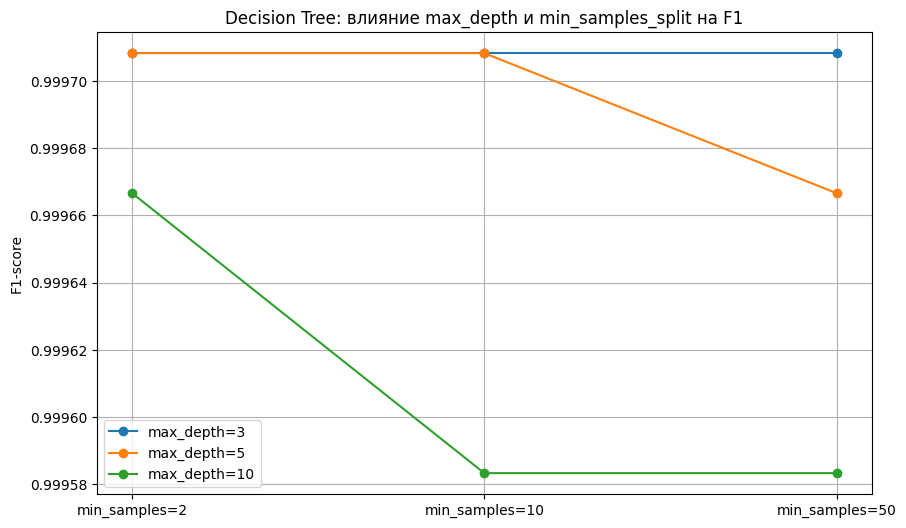

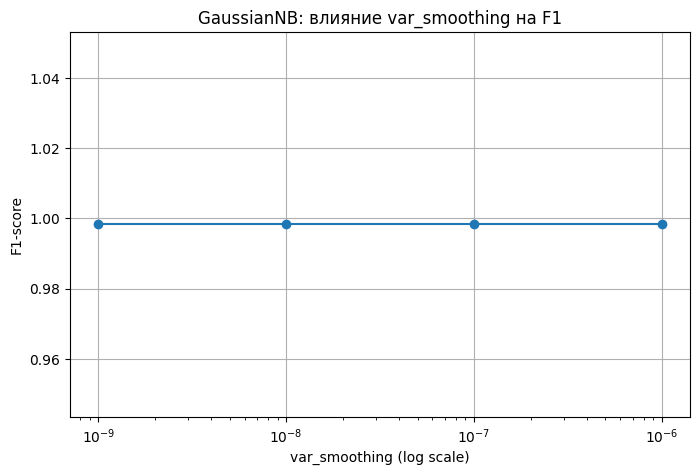

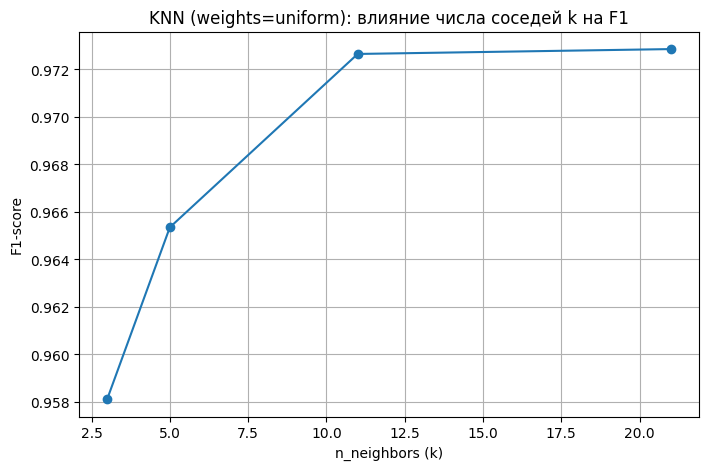

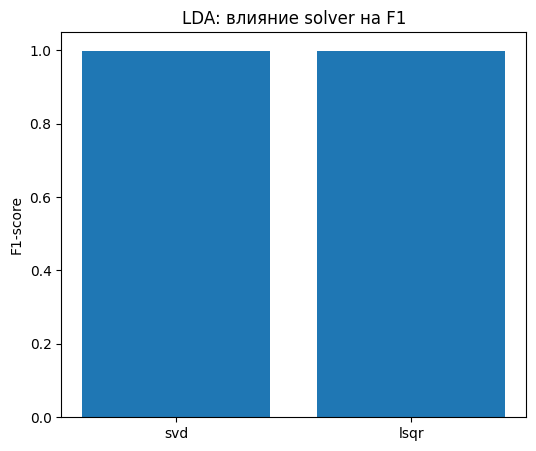

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# === 1. SVM — влияние C ===
svm_df = hyperparam_results_df[hyperparam_results_df["Model"] == "SVM (RBF)"]

plt.figure(figsize=(8,5))
plt.plot(svm_df["Value"], svm_df["F1"], marker='o')
plt.xlabel("C")
plt.ylabel("F1-score")
plt.title("SVM (RBF): влияние параметра C на F1")
plt.grid(True)
plt.show()


# === 2. Decision Tree — влияние max_depth + min_samples_split ===
dt_df = hyperparam_results_df[hyperparam_results_df["Model"] == "Decision Tree"]

plt.figure(figsize=(10,6))
depth_values = dt_df["Hyperparameter"].str.extract(r"max_depth=(\d+)")[0].unique()

for depth in depth_values:
    sub = dt_df[dt_df["Hyperparameter"].str.contains(f"max_depth={depth}")]
    plt.plot(sub["F1"].values, marker='o', label=f"max_depth={depth}")

plt.xticks(range(3), ["min_samples=2", "min_samples=10", "min_samples=50"])
plt.ylabel("F1-score")
plt.title("Decision Tree: влияние max_depth и min_samples_split на F1")
plt.legend()
plt.grid(True)
plt.show()


# === 3. GaussianNB — влияние var_smoothing ===
gnb_df = hyperparam_results_df[hyperparam_results_df["Model"] == "GaussianNB"]

plt.figure(figsize=(8,5))
plt.plot(gnb_df["Value"], gnb_df["F1"], marker='o')
plt.xscale("log")
plt.xlabel("var_smoothing (log scale)")
plt.ylabel("F1-score")
plt.title("GaussianNB: влияние var_smoothing на F1")
plt.grid(True)
plt.show()


# === 4. KNN — влияние k ===
knn_df = hyperparam_results_df[hyperparam_results_df["Model"] == "KNN"]
knn_uniform = knn_df[knn_df["Hyperparameter"].str.contains("weights=uniform")]

k_values = [int(x.split(",")[0].split("=")[1]) for x in knn_uniform["Hyperparameter"]]

plt.figure(figsize=(8,5))
plt.plot(k_values, knn_uniform["F1"], marker='o')
plt.xlabel("n_neighbors (k)")
plt.ylabel("F1-score")
plt.title("KNN (weights=uniform): влияние числа соседей k на F1")
plt.grid(True)
plt.show()


# === 5. LDA — влияние solver ===
lda_df = hyperparam_results_df[hyperparam_results_df["Model"] == "LDA"]

plt.figure(figsize=(6,5))
plt.bar(lda_df["Value"], lda_df["F1"])
plt.ylabel("F1-score")
plt.title("LDA: влияние solver на F1")
plt.show()


## Шаг 11. Нейронная сеть на TensorFlow + TensorBoard

В этом разделе мы:

1. Подготовим данные для нейронной сети (преобразуем в плотные массивы `numpy`).
2. Построим базовую полносвязную нейронную сеть (`Dense`-слои) для бинарной классификации диабета.
3. Настроим обучение с валидацией.
4. Подключим **TensorBoard** для визуализации `loss` и `accuracy` во времени.
5. Проведём небольшой эксперимент по изменению гиперпараметров:
   - число нейронов в скрытых слоях,
   - количество слоёв,
   - скорость обучения (`learning_rate`),
   - размер batch.

In [4]:
import numpy as np
import tensorflow as tf
import datetime
import os

# 1. Преобразуем sparse -> dense (если нужно)
X_train_nn = X_train_prepared.toarray() if hasattr(X_train_prepared, "toarray") else X_train_prepared
X_test_nn = X_test_prepared.toarray() if hasattr(X_test_prepared, "toarray") else X_test_prepared

y_train_nn = np.array(y_train)
y_test_nn = np.array(y_test)

X_train_nn.shape, X_test_nn.shape


((80000, 52), (20000, 52))

### 11.1. Базовая модель нейронной сети

Сделаем простую архитектуру:

- Входной слой: размер = числу признаков
- Скрытый слой 1: `Dense(64, activation='relu')`
- Скрытый слой 2: `Dense(32, activation='relu')`
- Выходной слой: `Dense(1, activation='sigmoid')` — бинарная классификация

Гиперпараметры базовой модели:

- `learning_rate = 1e-3`
- `batch_size = 256`
- `epochs = 20`
- оптимизатор: `Adam`
- loss: `binary_crossentropy`
- метрики: `accuracy`, `AUC`

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model(input_dim, units1=64, units2=32, learning_rate=1e-3):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(units1, activation='relu'),
        layers.Dense(units2, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

input_dim = X_train_nn.shape[1]
base_model = build_model(input_dim=input_dim, units1=64, units2=32, learning_rate=1e-3)
base_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,505 (21.50 KB)

 Trainable params: 5,505 (21.50 KB)

 Non-trainable params: 0 (0.00 B)

### 11.2. Подключаем TensorBoard

Логи будем писать в директорию:

`logs/nn_experiments/<дата_время>`

Также разделим часть обучающей выборки на валидацию через `validation_split=0.2`.


In [6]:
import os
import shutil
import datetime
from tensorflow import keras

# 1. Абсолютный путь к новой папке для логов
base_dir = os.getcwd()  # текущая папка, где лежит ноутбук
log_dir_base = os.path.join(base_dir, "tb_logs_fix")

print("Рабочая папка:", base_dir)
print("Папка для логов:", log_dir_base)

# 2. Полностью удаляем старую папку, если она вдруг есть
if os.path.exists(log_dir_base):
    print("Удаляю старую папку tb_logs_fix целиком...")
    shutil.rmtree(log_dir_base)

# 3. Создаём заново чистую папку
os.makedirs(log_dir_base, exist_ok=True)
print("Теперь это папка?:", os.path.isdir(log_dir_base))

# 4. Создаём подпапку для текущего запуска
run_name = "base_model"
log_dir = os.path.join(
    log_dir_base,
    run_name + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
)

print("Итоговый log_dir:", log_dir)


Рабочая папка: c:\Users\user\Desktop\machine
Папка для логов: c:\Users\user\Desktop\machine\tb_logs_fix
Удаляю старую папку tb_logs_fix целиком...
Теперь это папка?: True
Итоговый log_dir: c:\Users\user\Desktop\machine\tb_logs_fix\base_model_20251125-225917


In [7]:
tensorboard_cb = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1
)

history_base = base_model.fit(
    X_train_nn,
    y_train_nn,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    callbacks=[tensorboard_cb],
    verbose=1
)

test_loss, test_acc, test_auc = base_model.evaluate(X_test_nn, y_test_nn, verbose=0)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9539 - auc: 0.9929 - loss: 0.1260 - val_accuracy: 0.9994 - val_auc: 1.0000 - val_loss: 0.0049
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - auc: 1.0000 - loss: 0.0031 - val_accuracy: 0.9992 - val_auc: 1.0000 - val_loss: 0.0025
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - auc: 1.0000 - loss: 0.0020 - val_accuracy: 0.9991 - val_auc: 1.0000 - val_loss: 0.0025
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - auc: 1.0000 - loss: 0.0018 - val_accuracy: 0.9991 - val_auc: 1.0000 - val_loss: 0.0022
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - auc: 1.0000 - loss: 0.0015 - val_accuracy: 0.9992 - val_auc: 1.0000 - val_loss: 0.0019
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9995 - auc: 1.0000 - loss: 0.0013 - val_accuracy: 0.9987 - val_auc: 1.0000 - val_loss: 0.0026
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
%load_ext tensorboard
%tensorboard --logdir C:\tb_logs_fix

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 16924), started 0:02:27 ago. (Use '!kill 16924' to kill it.)

График accuracy показывает, что нейронная сеть быстро сходится — примерно к 7–8 эпохе train accuracy достигает почти 1.0. Validation accuracy остаётся стабильно высокой на уровне 0.998–0.999 и практически совпадает с train accuracy.
Это говорит об отсутствии переобучения и об общем высоком качестве модели. Модель уверенно обобщает данные и показывает почти идеальную точность на валидационной выборке.

In [11]:
# Полная версия опционального задания (5-fold CV + Grid Search по нейросети + TensorBoard)
# ВАЖНО: весь код рассчитан на запуск в ОДНОЙ ячейке Jupyter.
# При необходимости просто поменяй путь к CSV и к папке логов TensorBoard.

import os
import shutil
import datetime
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

# ==========================
# 1. Загрузка и подготовка данных
# ==========================


# Например: "diabetes_dataset.csv", если файл лежит рядом с ноутбуком
df = pd.read_csv("diabetes_dataset.csv")

target_col = "diagnosed_diabetes"
X = df.drop(columns=[target_col])
y = df[target_col].values

# Разделяем признаки по типам
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Препроцессинг: стандартизация числовых + One-Hot для категориальных
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Прогоняем весь датасет через препроцессор
X_prepared = preprocessor.fit_transform(X)

# Переводим в dense-формат (TensorFlow не любит sparse)
X_np = X_prepared.toarray() if hasattr(X_prepared, "toarray") else X_prepared
y_np = np.array(y)

print("Полный размер данных:", X_np.shape)

# ==========================
# 2. Делаем "лайт" по объёму: берём подвыборку данных для CV
# ==========================

# Возьмём, например, 30 000 объектов (чтобы не мучить ПК)
N_SAMPLES = 30000
X_small, _, y_small, _ = train_test_split(
    X_np,
    y_np,
    train_size=N_SAMPLES,
    stratify=y_np,
    random_state=42,
)

print("Размер подвыборки для нейросети:", X_small.shape)

input_dim = X_small.shape[1]

# ==========================
# 3. Функция построения модели (архитектура задаётся параметрами)
# ==========================

def build_model(input_dim, units1=64, units2=32, learning_rate=1e-3):
    """Строит простую полносвязную сеть для бинарной классификации."""
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(units1, activation="relu"),
        layers.Dense(units2, activation="relu"),
        layers.Dense(1, activation="sigmoid"),  # вероятность класса "1"
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")],
    )
    return model

# ==========================
# 4. Задаём сетку гиперпараметров (3 архитектуры × 3 learning_rate)
# ==========================

learning_rates = [5e-3, 1e-3, 5e-4]           # 3 значения lr
architectures = [(32, 16), (64, 32), (128, 64)]  # 3 варианта сети

configs = []
for units1, units2 in architectures:
    for lr in learning_rates:
        cfg_name = f"arch_{units1}_{units2}_lr_{lr}"
        configs.append({
            "name": cfg_name,
            "units1": units1,
            "units2": units2,
            "lr": lr,
        })

# Для удобства считаем baseline-моделью конфигурацию (маленькая сеть + большой lr → хуже всех)
BASELINE_NAME = "arch_32_16_lr_0.005"

print("Всего конфигураций:", len(configs))
print("Baseline конфигурация:", BASELINE_NAME)

# ==========================
# 5. Настройки кросс-валидации и TensorBoard
# ==========================

N_SPLITS = 5       # 5-кратная кросс-валидация
EPOCHS = 5         # немного эпох, чтобы было быстрее
BATCH_SIZE = 512   # крупный batch, меньше итераций

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# Папка для логов TensorBoard БЕЗ кириллицы (лучше абсолютный путь)
# При желании поменяй путь на удобный тебе.
log_dir_base = r"C:\tb_cv_logs"

# Полностью очищаем (если уже была) и создаём заново
if os.path.exists(log_dir_base):
    shutil.rmtree(log_dir_base)
os.makedirs(log_dir_base, exist_ok=True)

print("Папка для логов TensorBoard:", log_dir_base)

# ==========================
# 6. Цикл по конфигурациям и фолдам (5-fold CV + TensorBoard)
# ==========================

all_results = []  # сюда будем складывать метрики по всем фолдам/конфигам

tf.random.set_seed(42)  # для повторяемости

for cfg in configs:
    print(f"\n=== Конфигурация: {cfg['name']} ===")
    fold_idx = 0

    # K-fold разбиение
    for train_idx, val_idx in skf.split(X_small, y_small):
        fold_idx += 1
        print(f"  -> Фолд {fold_idx}/{N_SPLITS}")

        X_train_fold = X_small[train_idx]
        y_train_fold = y_small[train_idx]
        X_val_fold = X_small[val_idx]
        y_val_fold = y_small[val_idx]

        # Строим модель с заданной архитектурой и learning_rate
        model = build_model(
            input_dim=input_dim,
            units1=cfg["units1"],
            units2=cfg["units2"],
            learning_rate=cfg["lr"],
        )

        # Директория для логов этого фолда
        run_name = f"{cfg['name']}_fold_{fold_idx}"
        log_dir = os.path.join(
            log_dir_base,
            run_name + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        )
        tb_cb = TensorBoard(log_dir=log_dir, histogram_freq=0)

        # Обучаем модель на фолде
        history = model.fit(
            X_train_fold,
            y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=[tb_cb],
            verbose=0,  # при желании можно поставить 1
        )

        # Оцениваем качество на валидации фолда
        val_loss, val_acc, val_auc = model.evaluate(X_val_fold, y_val_fold, verbose=0)

        all_results.append({
            "config_name": cfg["name"],
            "units1": cfg["units1"],
            "units2": cfg["units2"],
            "learning_rate": cfg["lr"],
            "fold": fold_idx,
            "val_loss": val_loss,
            "val_accuracy": val_acc,
            "val_auc": val_auc,
        })

# ==========================
# 7. Сводная таблица по конфигурациям (усреднённые метрики по 5 фолдам)
# ==========================

results_df = pd.DataFrame(all_results)
print("\nПервые строки с результатами по фолдам:")
print(results_df.head())

summary_df = (
    results_df
    .groupby("config_name")
    .agg(
        mean_val_accuracy=("val_accuracy", "mean"),
        std_val_accuracy=("val_accuracy", "std"),
        mean_val_loss=("val_loss", "mean"),
        mean_val_auc=("val_auc", "mean"),
    )
    .reset_index()
)

print("\nСводная таблица по конфигурациям (усреднено по 5 фолдам):")
print(summary_df.sort_values("mean_val_accuracy", ascending=False))

# ==========================
# 8. Сравнение baseline и лучшей конфигурации
# ==========================

# Лучшая по среднему accuracy конфигурация
best_row = summary_df.sort_values("mean_val_accuracy", ascending=False).iloc[0]

# Строка для baseline (если есть в таблице)
if BASELINE_NAME in summary_df["config_name"].values:
    baseline_row = summary_df[summary_df["config_name"] == BASELINE_NAME].iloc[0]
    print("\nBaseline конфигурация:")
    print(baseline_row)

    print("\nЛучшая найденная конфигурация:")
    print(best_row)

    improv = best_row["mean_val_accuracy"] - baseline_row["mean_val_accuracy"]
    print(f"\nПрирост accuracy относительно baseline: {improv:.6f}")
else:
    print("\nBaseline-конфигурация не найдена в summary_df (проверь BASELINE_NAME).")

# ==========================
# 9. Подсказка по TensorBoard
# ==========================
print("\nГотово! Теперь можно запустить в ОТДЕЛЬНОЙ ячейке:")
print("%load_ext tensorboard")
print(f"%tensorboard --logdir {log_dir_base}")


Полный размер данных: (100000, 52)
Размер подвыборки для нейросети: (30000, 52)
Всего конфигураций: 9
Baseline конфигурация: arch_32_16_lr_0.005
Папка для логов TensorBoard: C:\tb_cv_logs

=== Конфигурация: arch_32_16_lr_0.005 ===
  -> Фолд 1/5
  -> Фолд 2/5
  -> Фолд 3/5
  -> Фолд 4/5
  -> Фолд 5/5

=== Конфигурация: arch_32_16_lr_0.001 ===
  -> Фолд 1/5
  -> Фолд 2/5
  -> Фолд 3/5
  -> Фолд 4/5
  -> Фолд 5/5

=== Конфигурация: arch_32_16_lr_0.0005 ===
  -> Фолд 1/5
  -> Фолд 2/5
  -> Фолд 3/5
  -> Фолд 4/5
  -> Фолд 5/5

=== Конфигурация: arch_64_32_lr_0.005 ===
  -> Фолд 1/5
  -> Фолд 2/5
  -> Фолд 3/5
  -> Фолд 4/5
  -> Фолд 5/5

=== Конфигурация: arch_64_32_lr_0.001 ===
  -> Фолд 1/5
  -> Фолд 2/5
  -> Фолд 3/5
  -> Фолд 4/5
  -> Фолд 5/5

=== Конфигурация: arch_64_32_lr_0.0005 ===
  -> Фолд 1/5
  -> Фолд 2/5
  -> Фолд 3/5
  -> Фолд 4/5
  -> Фолд 5/5

=== Конфигурация: arch_128_64_lr_0.005 ===
  -> Фолд 1/5
  -> Фолд 2/5
  -> Фолд 3/5
  -> Фолд 4/5
  -> Фолд 5/5

=== Конфигурация:

In [15]:
%load_ext tensorboard
%tensorboard --logdir tb_cv_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6008 (pid 15000), started 1 day, 19:29:55 ago. (Use '!kill 15000' to kill it.)

На графиках отображаются линии обучения (loss и accuracy) для всех конфигураций нейронных сетей и всех 5 фолдов кросс-валидации. Каждая линия соответствует отдельному запуску обучения на своём фолде.
Уменьшение loss и рост accuracy для всех запусков свидетельствуют о корректной и стабильной работе моделей. Разброс между фолдами минимален, что подтверждает устойчивость результатов к разбиению данных.

In [13]:
%reload_ext tensorboard

In [8]:
!kill 15000

"kill" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
